In [3]:
import urllib
import pytz
import pandas_datareader.data as web
import datetime
from bs4 import BeautifulSoup
import csv

In [36]:
thisurl = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies" # the wikipedia url containing list of S&P 500 companie
myPage = urllib.request.urlopen(thisurl) # opens this url

mySoup = BeautifulSoup(myPage, "html.parser") # parse html soup 

table = mySoup.find('table', {'class': 'wikitable sortable'}) # finds wiki sortable table in webpage html

sector_tickers = dict() # create a dictionary to store all tickers according to sector
for row in table.findAll('tr'): # find every row in the table
    col = row.findAll('td') # find every column in that row
    if len(col) > 0 : # if there are columns in that row
        sector = str(col[3].string.strip()).lower().replace(' ', '_') # identify the sector in the row
        if col[0] is not None:
          ticker = col[0] # identify the ticker in the row
        if sector not in sector_tickers: # if this sector is not a key in the dictionary
            sector_tickers[sector] = list() # add this as a key to the dictionary
        sector_tickers[sector].append(ticker) # add the ticker to right key in the dictionary
# for i in sector_tickers:
  # print (i,sector_tickers[i])

industrials [<td><a class="external text" href="https://www.nyse.com/quote/XNYS:MMM" rel="nofollow">MMM</a>
</td>, <td><a class="external text" href="https://www.nyse.com/quote/XNYS:ALK" rel="nofollow">ALK</a>
</td>, <td><a class="external text" href="https://www.nyse.com/quote/XNYS:ALLE" rel="nofollow">ALLE</a>
</td>, <td><a class="external text" href="http://www.nasdaq.com/symbol/aal" rel="nofollow">AAL</a>
</td>, <td><a class="external text" href="https://www.nyse.com/quote/XNYS:AME" rel="nofollow">AME</a>
</td>, <td><a class="external text" href="https://www.nyse.com/quote/XNYS:AOS" rel="nofollow">AOS</a>
</td>, <td><a class="external text" href="https://www.nyse.com/quote/XNYS:BA" rel="nofollow">BA</a>
</td>, <td><a class="external text" href="http://www.nasdaq.com/symbol/chrw" rel="nofollow">CHRW</a>
</td>, <td><a class="external text" href="https://www.nyse.com/quote/XNYS:CARR" rel="nofollow">CARR</a>
</td>, <td><a class="external text" href="https://www.nyse.com/quote/XNYS:CAT"

In [110]:
#### Section 2: Queries Yahoo Finance for historical data on tickers

# Start and end dates for historical data
start = datetime.datetime(2015, 1, 1)  # start date
end = datetime.datetime(2020, 12, 31) # end date

myKeys = sector_tickers.keys() # find all the sectors which are keys in the dictionary we created in Step 1
myKeys = (list(myKeys))
# print (myKeys)
for i in range(0,len(myKeys)): # for each key in the dictionary which represents a sector
    # print (myKeys[i])
    myTickers = sector_tickers[myKeys[i]] # find the tickers in that list
    for j in range(0,len(myTickers)): # for each ticker
        # print (myTickers[j].a.text)
        try:
          myData = web.DataReader(myTickers[j].a.text, 'yahoo', start, end) # query the pandas datareader to pull data from Yahoo! finance
          fileName = myTickers[j].a.text + '.csv' # create a file
          myData['GICS_Sector']=[myKeys[i]]*len(myData)
          myData.to_csv("/content/sample_data/files/"+fileName) # save data to the file
        except Exception as e:
          pass

In [67]:
import os

print ((os.listdir("/content/sample_data/files")))

['ACN.csv', 'CHRW.csv', 'MRK.csv', 'ABC.csv', 'SPGI.csv', 'NWS.csv', 'IR.csv', 'CMS.csv', 'AVB.csv', 'SJM.csv', 'NFLX.csv', 'HFC.csv', 'SO.csv', 'REG.csv', 'C.csv', 'AMAT.csv', 'YUM.csv', 'FCX.csv', 'IT.csv', 'BIO.csv', 'IEX.csv', 'DD.csv', 'WY.csv', 'MTB.csv', 'AVY.csv', 'GOOG.csv', 'TJX.csv', 'DOW.csv', 'AXP.csv', 'IVZ.csv', 'DG.csv', 'AVGO.csv', 'WFC.csv', 'PBCT.csv', 'AAL.csv', 'BEN.csv', 'IDXX.csv', 'GM.csv', 'XRAY.csv', 'PSX.csv', 'NVR.csv', 'D.csv', 'HBI.csv', 'AME.csv', 'DXCM.csv', 'VFC.csv', 'BSX.csv', 'QCOM.csv', 'F.csv', 'ODFL.csv', 'HWM.csv', 'WMT.csv', 'MU.csv', 'O.csv', 'LMT.csv', 'UDR.csv', 'MLM.csv', 'ICE.csv', 'CL.csv', 'ED.csv', 'MGM.csv', 'KEY.csv', 'VNO.csv', 'UNH.csv', 'AES.csv', 'SLG.csv', 'AAPL.csv', 'TDG.csv', 'ANSS.csv', 'GPS.csv', 'PHM.csv', 'KMX.csv', 'J.csv', 'BKNG.csv', 'DVA.csv', 'PLD.csv', 'PPG.csv', 'MA.csv', 'MRO.csv', 'GE.csv', 'UA.csv', 'DRI.csv', 'MKTX.csv', 'MS.csv', 'CFG.csv', 'GILD.csv', 'DPZ.csv', 'WMB.csv', 'BAX.csv', 'DLTR.csv', 'LUMN.csv', 'US

In [111]:
import shutil
shutil.make_archive("index", 'zip', "/content/sample_data/files")

'/content/index.zip'

In [112]:
import pandas as pd
import numpy as np

files=os.listdir("/content/sample_data/files")
data=[]
for j in files:
  x=pd.read_csv("/content/sample_data/files/"+j)
  li=[0.00]
  sectorname=x['GICS_Sector'][0]
  closed=list(x.Close)
  for i in range(1,len(closed)):
    per=((closed[i-1]-closed[i])/closed[i-1])*100
    li.append(per)
  x['%Gain or %Loss']=li
  avg=sum(li)/len(li)
  data.append([j.split(".")[0],avg,sectorname])
  x.to_csv("/content/sample_data/Daywise/"+j)
  df = pd.DataFrame(data, columns = ['StockName', 'AvgGain','GICS_Sector'])
  df.to_csv("/content/sample_data/avggain.csv")


In [113]:
avggain=pd.read_csv("/content/sample_data/avggain.csv")
avggain.sort_values(by=['AvgGain'], inplace=True)
avggain.to_csv("/content/sample_data/avggain.csv")
avggain

,Unnamed: 0,StockName,AvgGain,GICS_Sector
182,182,CARR,-0.652483,industrials
468,468,AMD,-0.312127,information_technology
224,224,VNT,-0.306874,information_technology
380,380,NVDA,-0.256543,information_technology
463,463,TSLA,-0.244170,consumer_discretionary
...,...,...,...,...
434,434,NOV,0.055484,energy
285,285,PRGO,0.056257,health_care
194,194,FTI,0.058269,energy
469,469,SLB,0.058787,energy


In [117]:
least25=avggain[:25]
least25['color']=['red']*len(least25)
least25.to_csv("/content/sample_data/bottom25.csv")
least25

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,StockName,AvgGain,GICS_Sector,color
182,182,CARR,-0.652483,industrials,red
468,468,AMD,-0.312127,information_technology,red
224,224,VNT,-0.306874,information_technology,red
380,380,NVDA,-0.256543,information_technology,red
463,463,TSLA,-0.244170,consumer_discretionary,red
385,385,OTIS,-0.232840,industrials,red
155,155,PAYC,-0.230686,information_technology,red
309,309,ETSY,-0.194386,consumer_discretionary,red
10,10,NFLX,-0.193227,communication_services,red
260,260,ALGN,-0.189905,health_care,red


In [123]:
top25=pd.DataFrame(avggain[len(avggain)-25:])
top25['color']=['blue']*len(top25)
top25[::-1].to_csv("/content/sample_data/top25.csv")
print (type(top25))
top25

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,StockName,AvgGain,GICS_Sector,color
65,65,SLG,0.019165,real_estate,blue
32,32,WFC,0.019516,financials,blue
29,29,IVZ,0.022400,financials,blue
177,177,DISH,0.022961,communication_services,blue
200,200,WBA,0.024786,consumer_staples,blue
199,199,BKR,0.025128,energy,blue
79,79,GE,0.025218,industrials,blue
409,409,DVN,0.025658,energy,blue
34,34,AAL,0.025722,industrials,blue
419,419,NLSN,0.025919,industrials,blue


In [116]:
shutil.make_archive("index22", 'zip', "/content/sample_data/Daywise")

'/content/index22.zip'

In [231]:

top=pd.read_csv("/content/sample_data/top25.csv")
last=pd.read_csv("/content/sample_data/bottom25.csv")
top.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

last.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)
con=pd.concat([top,last])

con2=con.groupby(['GICS_Sector','color']).agg(['count'])
con1=pd.DataFrame(con2['StockName'])
con1.to_csv("/content/sample_data/files/check.csv")

In [237]:
mycon=pd.read_csv("/content/sample_data/files/check.csv")
mycon.columns

Index(['GICS_Sector', 'color', 'count'], dtype='object')

In [268]:

dk={}
for i in mycon.index:
  kk=mycon['GICS_Sector'][i]
  kk=str(kk)
  # print (type(kk))
  if kk not in dk:
    dk[kk]=[]
    dk[kk].append(mycon['count'][i])
  else:
    dk[kk].append(mycon['count'][i])
for i in mycon.index:
  kk=mycon['GICS_Sector'][i]
  kk=str(kk)
  if len(dk[kk])<2:
    dk[kk].append(0)
print (list(dk.values()))

mycon

[[3, 2], [1, 3], [2, 0], [9, 0], [3, 2], [2, 4], [3, 3], [11, 0], [2, 0]]


,GICS_Sector,color,count
0,communication_services,blue,3
1,communication_services,red,2
2,consumer_discretionary,blue,1
3,consumer_discretionary,red,3
4,consumer_staples,blue,2
5,energy,blue,9
6,financials,blue,3
7,financials,red,2
8,health_care,blue,2
9,health_care,red,4


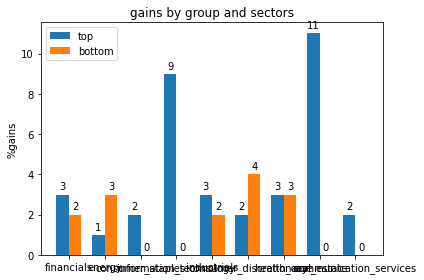

In [285]:
import matplotlib.pyplot as plt

labels = list(set(mycon['GICS_Sector']))
y=[]
z=[]
for i in list(dk.values()):
  y.append(i[0])
  z.append(i[1])
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y, width, label='top')
rects2 = ax.bar(x + width/2, z, width, label='bottom')
ax.set_ylabel('%gains')
ax.set_title('gains by group and sectors')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()